# Weather Data Analysis Notebook

This Jupyter Notebook performs exploratory data analysis (EDA) on historical weather data collected through the **Weather ETL Pipeline**.
The goal of this notebook is to:

- Load weather data from a PostgreSQL database
- Explore basic statistics such as average, min, and max temperature
- Visualize temperature changes over time
- Demonstrate how the ETL pipeline enables data analytics


## Import Packages

The following Python packages are used in this notebook:

- **json** – loading configuration file
- **pandas** – working with tabular data
- **psycopg2** – connecting to PostgreSQL
- **matplotlib** – plotting graphs



In [14]:
import json
import pandas as pd
import psycopg2
import matplotlib.pyplot as plt

%matplotlib inline

## Load Data from PostgreSQL

In this step, we:

1. Load the database configuration from `config.json`
2. Connect to the PostgreSQL database
3. Execute an SQL query to retrieve historical weather data
4. Convert the result into a pandas DataFrame


In [15]:
with open("config/config.example.json") as f:
    cfg = json.load(f)

conn = psycopg2.connect(**cfg["db"])

query = """
SELECT city, temperature, humidity, pressure, wind_speed, timestamp
FROM weather
ORDER BY timestamp;
"""

df = pd.read_sql(query, conn)
conn.close()

/var/folders/yw/znfxt5x97_l4xvgs080h00n40000gn/T/ipykernel_17920/2262414221.py:12: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


### Preview of Retrieved Data

Below is a sample of the weather records loaded from the database.
Each row represents one snapshot collected by the ETL pipeline.

In [16]:
df.head()

,city,temperature,humidity,pressure,wind_speed,timestamp
0,Bratislava,6.61,60,1020,4.12,2025-11-18 14:24:59.859105
1,Bratislava,6.42,61,1019,4.12,2025-11-18 14:35:54.880525
2,Bratislava,6.42,61,1019,4.12,2025-11-18 14:35:56.566332
3,Bratislava,6.42,61,1019,4.12,2025-11-18 14:35:57.875813
4,Bratislava,6.42,61,1019,4.12,2025-11-18 14:35:58.775227


## Basic Statistical Analysis

This section provides a statistical summary of the collected weather data, including:

- Count of measurements
- Mean temperature
- Minimum and maximum recorded temperature
- Humidity and pressure statistics


In [17]:
df.describe()

,temperature,humidity,pressure,wind_speed,timestamp
count,15.000000,15.00000,15.000000,15.000000,15
mean,3.636667,77.40000,1016.600000,3.817333,2025-11-18 18:43:55.726984704
min,-1.270000,60.00000,1009.000000,0.510000,2025-11-18 14:24:59.859105
25%,0.880000,61.00000,1015.000000,2.830000,2025-11-18 14:35:58.325519872
50%,4.580000,81.00000,1018.000000,4.120000,2025-11-18 19:03:40.635877888
75%,6.420000,88.50000,1019.000000,5.145000,2025-11-18 22:34:19.218061568
max,6.610000,90.00000,1020.000000,6.170000,2025-11-18 22:34:23.277171
std,2.916793,12.73802,3.521363,1.885154,NaN


## Temperature Over Time

The following line plot shows how the temperature changed over time.
This visualization makes it easier to spot:

- warming and cooling trends
- sudden jumps
- daily patterns (if the pipeline runs regularly)


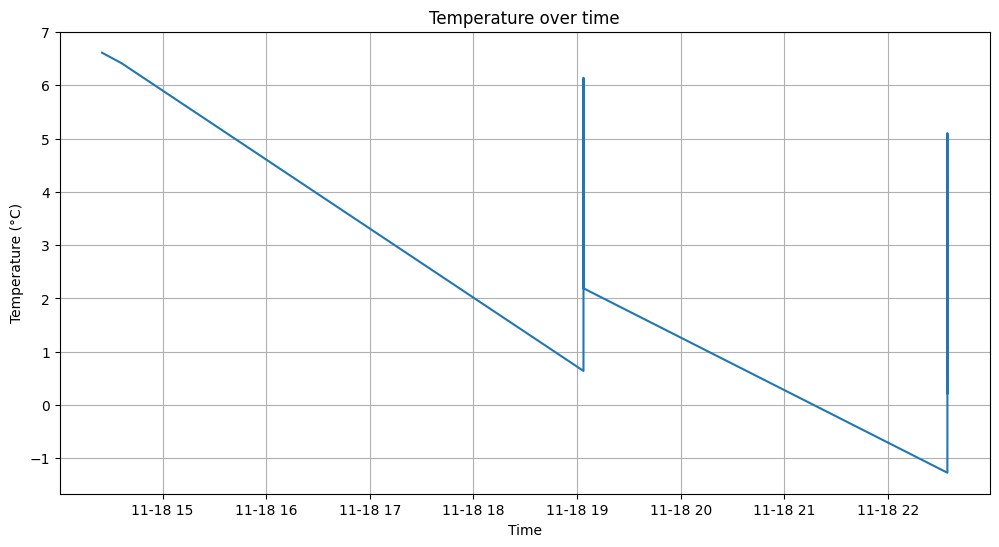

In [18]:
plt.figure(figsize=(12, 6))
plt.plot(df["timestamp"], df["temperature"])
plt.title("Temperature over time")
plt.xlabel("Time")
plt.ylabel("Temperature (°C)")
plt.grid()
plt.show()
